# Data Cleaning

Today, we will be cleaning up the titanic dataset.

## Import Library

In [1]:
# math
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Import Warnings
import warnings
warnings.simplefilter(action="ignore")

## Import Dataset 

In [2]:
df = pd.read_csv("titanic.tsv", sep='\t')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S,Titanic
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C,Titanic
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S,Titanic


In [3]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  894 non-null    int64  
 1   Survived     894 non-null    int64  
 2   Pclass       894 non-null    float64
 3   Name         894 non-null    object 
 4   Sex          894 non-null    object 
 5   Age          721 non-null    object 
 6   SibSp        894 non-null    int64  
 7   Parch        894 non-null    object 
 8   Ticket       893 non-null    object 
 9   Fare         893 non-null    object 
 10  Cabin        208 non-null    object 
 11  Embarked     892 non-null    object 
 12  ship         894 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 90.9+ KB


As we can see above, several columns do not match the data content. Among them, the Pclass, age, Parch, and Fare columns are of object data type, while the data is numeric. So, we can change it into numeric data types.

In [4]:
# Age Column
df['Age'] = pd.to_numeric(df.Age, errors='coerce')

# Parch column
df['Parch'] = pd.to_numeric(df.Parch, errors='coerce')

# Fare Column
df['Fare'] = df['Fare'].str.replace(',','.')
df['Fare'] = pd.to_numeric(df.Fare, errors='coerce')




# Checking data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
ship            object
dtype: object

Now the table contents and data types are synchronized.

### Checking Duplicates Dataset

In [5]:
df['PassengerId'].duplicated().sum()

4

In [6]:
df[df['PassengerId'].duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
13,11,1,3.0,"Sandstrom, Miss. Marguerite Ru&5$$",female,4.0,1,1.0,PP 9549,16.7,G6,S,Titanic
23,11,1,3.0,"Sandstrom, Miss. Marguerite Ru&5$$",female,4.0,1,1.0,PP 9549,16.7,G6,S,Titanic
520,225,1,1.0,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0.0,19943,90.0,C93,S,Titanic
678,225,1,1.0,"Hoytt, Mr. Frederick Maxfield",male,38.0,1,0.0,19943,90.0,C93,S,Titanic


In [7]:
df_titanic = df.drop_duplicates(subset=['PassengerId'])

In [8]:
df_titanic['PassengerId'].duplicated().sum()

0

In [9]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0.0,A/5 21171,7.2500,NaN,S,Titanic
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0.0,PC 17599,71.2833,C85,C,Titanic
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0.0,STON/O2. 3101282,7.9250,NaN,S,Titanic


## Analysis

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,894.000000,894.000000,894.000000,696.000000,894.000000,893.000000,892.000000
mean,446.030201,0.381432,2.305369,36.203448,0.604027,0.371781,32.075985
std,259.208003,0.508529,0.847653,167.817961,2.571231,0.768325,49.868844
min,-12.000000,-4.000000,-2.000000,-12.000000,0.000000,0.000000,-90.000000
25%,223.250000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,444.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.750000,1.000000,3.000000,38.000000,1.000000,0.000000,30.771850
max,1143.000000,1.000000,3.000000,4435.000000,70.000000,5.000000,512.329200


## Checking Dataset Problem

In [11]:
print("The Dataset : ")
df.tail()

The Dataset : 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26.0,0,0.0,111369,30.0000,C148,C,Titanic
890,891,0,3.0,"Dooley, Mr. Patrick",male,32.0,0,0.0,370376,7.7500,NaN,Q,Titanic
891,1000,1,1.0,Mr. Frederick Maxfield Hoyt,male,38.0,1,0.0,19943,90.0000,C93,S,Titanic
892,1143,1,3.0,"Sandstrom, Miss. Marguerite Ru&5$$",female,4.0,1,1.0,PP 9549,16.7000,G6,S,Titanic
893,-12,0,3.0,"Vestrom, Miss. Hulda Amanda Adolfina",female,0.7,0,0.0,350406,7.8542,NaN,S,Titanic


### Column Name

We can see the ship has a small latter, so we change it into capital to make easy in other steps.

In [12]:
df.rename(columns = {'ship':'Ship'}, inplace = True)
df.dtypes

PassengerId      int64
Survived         int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Ship            object
dtype: object

Looks better. Now, let's into another problem.

### Data Duplicated

In [13]:
duplicateRows = df[df.duplicated()]
print(duplicateRows)

     PassengerId  Survived  Pclass                                Name  \
13            11         1     3.0  Sandstrom, Miss. Marguerite Ru&5$$   
23            11         1     3.0  Sandstrom, Miss. Marguerite Ru&5$$   
520          225         1     1.0        Hoyt, Mr. Frederick Maxfield   

        Sex   Age  SibSp  Parch   Ticket  Fare Cabin Embarked     Ship  
13   female   4.0      1    1.0  PP 9549  16.7    G6        S  Titanic  
23   female   4.0      1    1.0  PP 9549  16.7    G6        S  Titanic  
520    male  38.0      1    0.0    19943  90.0   C93        S  Titanic  


In [14]:
#Using Dataframe.drop_duplicates() to keep first duplicate row

df2 = df.drop_duplicates(keep='first')
print(df2)

     PassengerId  Survived  Pclass  \
0              1         0     3.0   
1              2         1     1.0   
2              3         1     3.0   
3              4         1     1.0   
4              5         0     3.0   
..           ...       ...     ...   
889          890         1     1.0   
890          891         0     3.0   
891         1000         1     1.0   
892         1143         1     3.0   
893          -12         0     3.0   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

### Missing Values

#### Checking the amount of missing data.

In [15]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            198
SibSp            0
Parch            1
Ticket           1
Fare             2
Cabin          686
Embarked         2
Ship             0
dtype: int64

As we can see, there are some missing values. This will be a problem in itself because there are many of them. We will solve this problem with various techniques.

##### Age Column

In the age table, we will use the median age available in the dataset to fill in the missing values in the age column. This is because the data in the age column can be used for finding the average of the ship's passenger group.

In [16]:
df2['Age'] = df2['Age'].fillna(df2['Age'].median()).astype(int)
print("Missing value of the age column solved")
print("-" * 100)

# Checking another missing value
print("Checking another missing value :")
df2.isnull().sum()

Missing value of the age column solved
----------------------------------------------------------------------------------------------------
Checking another missing value :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            1
Ticket           1
Fare             2
Cabin          686
Embarked         2
Ship             0
dtype: int64

#### Parch Column

In this table, we use the mean value to fill in the missing values because the distribution of the data values is symmetrical, and there are no clear outliers.

In [17]:
df2['Parch'] = df2['Parch'].fillna(np.mean(df['Parch'])).astype(int)
print("Missing value of the Parch column solved")
print("-" * 100)

# Checking another missing value
print("Checking another missing value :")
df2.isnull().sum()

Missing value of the Parch column solved
----------------------------------------------------------------------------------------------------
Checking another missing value :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           1
Fare             2
Cabin          686
Embarked         2
Ship             0
dtype: int64

#### Ticket Column

Since this table is an object, we use mode to find the most frequent value.

In [18]:
df2['Ticket'].mode()

0        1601
1    CA. 2343
Name: Ticket, dtype: object

In [19]:
df2['Ticket'].fillna(df2['Ticket'].mode()[0], inplace=True)
print("Missing value of the ticket column solved")
print("-" * 100)

# Checking another missing value
print("Checking another missing value :")
df2.isnull().sum()

Missing value of the ticket column solved
----------------------------------------------------------------------------------------------------
Checking another missing value :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             2
Cabin          686
Embarked         2
Ship             0
dtype: int64

#### Fare Column

In this table, we use the mean value to fill in the missing values because the distribution of the data values is symmetrical, and there are no clear outliers.

In [20]:
df2['Fare'] = df2['Fare'].fillna(np.mean(df2['Fare']))
print("Missing value of the Fare column solved")
print("-" * 100)

# Checking another missing value
print("Checking another missing value :")
df2.isnull().sum()

Missing value of the Fare column solved
----------------------------------------------------------------------------------------------------
Checking another missing value :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
Ship             0
dtype: int64

#### Cabin Column

Since this table is an object, and the missing value is bigger, so we add unknown for the missing value

In [21]:
df2['Cabin'].fillna("Unknown",axis=0,inplace=True)
print("Missing value of the cabin column solved")
print("-" * 100)

# Checking another missing value
print("Checking another missing value :")
df2.isnull().sum()

Missing value of the cabin column solved
----------------------------------------------------------------------------------------------------
Checking another missing value :


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Ship           0
dtype: int64

#### Embarked Column

Since this table is an object, we use mode to find the most frequent value

In [22]:
df2['Embarked'].mode()

0    S
Name: Embarked, dtype: object

Since the most frequent data is "S", the missing value in this table will be "S".

In [23]:
df2['Embarked'].fillna(df2['Embarked'].mode()[0], inplace=True)
print("Missing value of the Embarked column solved")
print("-" * 100)

# Checking another missing value
print("Checking another missing value :")
df2.isnull().sum()

Missing value of the Embarked column solved
----------------------------------------------------------------------------------------------------
Checking another missing value :


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Ship           0
dtype: int64

Now, all columns don't have the missing values.

### Labelling Dataset Problem

##### Sex Column

In [24]:
df2['Sex'].value_counts()

male       574
female     308
fem          2
malef        1
mal          1
femmale      1
feemale      1
Female       1
malee        1
F            1
Name: Sex, dtype: int64

In this gender column, we can see the inconsistency in gender labeling. So we change it to male and female.

The labels malef, male, and malee change to male. Then, fem, femmale, feemale, Female, and F change to female. Therefore, this column will only have two labels (male and female).

In [25]:
# Replace the value in columns Sex

# male
df2['Sex'] = df2['Sex'].replace(['malef', 'mal', 'malee'], 'male')

# female
df2['Sex'] = df2['Sex'].replace(['fem', 'femmale', 'feemale', 'Female','F'], 'female')

df2['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

##### Embarked Column

In [26]:
df2['Embarked'].value_counts()

S     644
C     167
Q      76
So      2
Co      1
Qe      1
Name: Embarked, dtype: int64

In this embarked column, we can see the inconsistency in the labeling. So we change it to S, C and Q.

So into S
Co into Co
Qe into Q

In [27]:
# Replace the value in columns Embarked

df2['Embarked'] = df2['Embarked'].replace(['So'], 'S')
df2['Embarked'] = df2['Embarked'].replace(['Co'], 'C')
df2['Embarked'] = df2['Embarked'].replace(['Qe'], 'Q')

df2['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

##### Titanic Column

In [28]:
df2['Ship'].value_counts()

Titanic    889
Titani       1
Titnic       1
Name: Ship, dtype: int64

As we can see, there are some values. It suppose Titanic. Then, we replace Titani and Titnic to Titanic.

In [29]:
# Replace the value in columns Embarked

df2['Ship'] = df2['Ship'].replace(['Titani', 'Titnic'], 'Titanic')

df2['Ship'].value_counts()

Titanic    891
Name: Ship, dtype: int64

In [30]:
print("The Results")
print("-" * 100)
df2.head(2)

The Results
----------------------------------------------------------------------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ship
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Unknown,S,Titanic
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Titanic


### Outlier Detection

In [31]:
# analysis
df2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.00000,891.000000
mean,447.254770,0.379349,2.305275,34.448934,0.602694,0.37037,32.045420
std,258.715268,0.508114,0.847312,148.330834,2.575458,0.76861,49.853724
min,-12.000000,-4.000000,-2.000000,-12.000000,0.000000,0.00000,-90.000000
25%,224.500000,0.000000,2.000000,22.000000,0.000000,0.00000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.00000,14.454200
75%,669.500000,1.000000,3.000000,35.000000,1.000000,0.00000,31.000000
max,1143.000000,1.000000,3.000000,4435.000000,70.000000,5.00000,512.329200


##### Column Survived

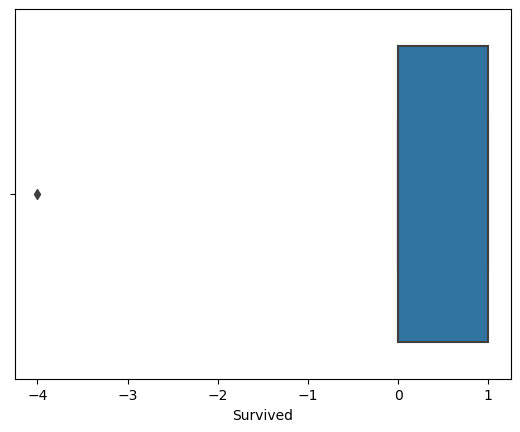

In [32]:
# Outliers Detection

sns.boxplot(x=df2['Survived'])
plt.show()

In [33]:
# Column Survived
df2['Survived'].value_counts()

 0    548
 1    342
-4      1
Name: Survived, dtype: int64

In survived columns, the minimum value is -4, and the maximum is 1, but we can see this column has a mean value bigger than zero. So, we will change -4 into 0 since it is below the mean value.

Only one data has -4. Now, we replace it into 0. Hence, the survived column only has two values (0 and 1).

In [34]:
# Replace the value in columns Survived
df2['Survived'] = df2['Survived'].replace([-4], 0)
df2['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

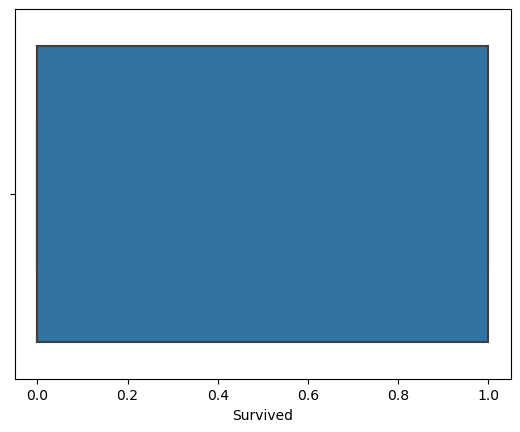

In [35]:
# Outliers Detection

sns.boxplot(x=df2['Survived'])
plt.show()

##### Column Pclass

Pclass column has a mean value bigger than 0, but it has a minimum value of -2, which is lower than the mean value. Let's look at the values.

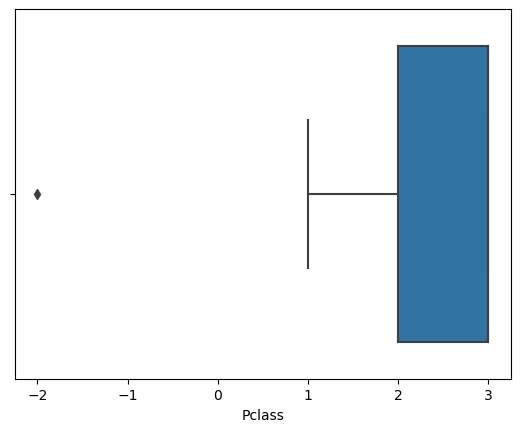

In [36]:
# Outliers Detection

sns.boxplot(x=df2['Pclass'])
plt.show()

In [37]:
df2['Pclass'].value_counts()

 3.0    491
 1.0    215
 2.0    184
-2.0      1
Name: Pclass, dtype: int64

As we can see, only 1 data has -2.0. We can replace it with a minimum value (1) because it is also lower than the mean value. Then, this column will have three values (3.0, 2.0, and 1.0).

In [38]:
df2['Pclass'] = df2['Pclass'].replace([-2], 1)
df2['Pclass'].value_counts()

3.0    491
1.0    216
2.0    184
Name: Pclass, dtype: int64

The Results
----------------------------------------------------------------------------------------------------


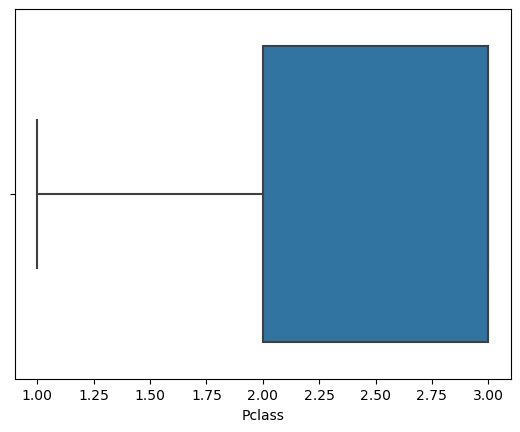

In [39]:
print("The Results")
print("-" * 100)

# Outliers Detection

sns.boxplot(x=df2['Pclass'])
plt.show()

##### Column Age

The age column has significant data inequality with a minimum value of -2 and a maximum of more than 4,000. Meanwhile, the mean value of the age column is 36.20.

In [40]:
df2['Age'].value_counts()

 28    222
 24     30
 22     27
 18     26
 19     25
      ... 
-12      1
-3       1
 66      1
 12      1
 74      1
Name: Age, Length: 75, dtype: int64

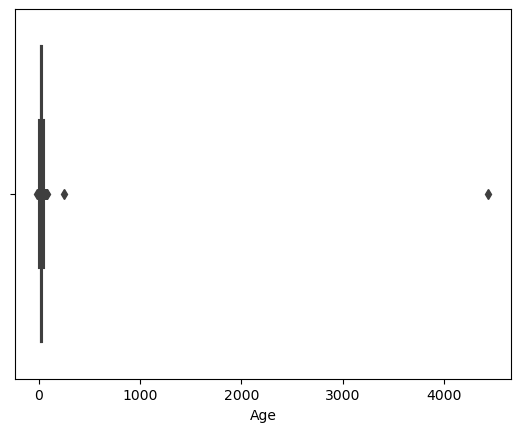

In [41]:
# Outliers Detection

sns.boxplot(x=df2['Age'])
plt.show()

Because age has a varied range, we choose the Winsorizing to replace with other values. Common is replacing the outliers on th upper side with 75% percentile value and outlier on the lower side with 25% percentile.

In [42]:
from scipy.stats.mstats import winsorize
from scipy.stats import mstats

df2['Age'] = winsorize(df2['Age'], limits = 0.25)

Check the Result

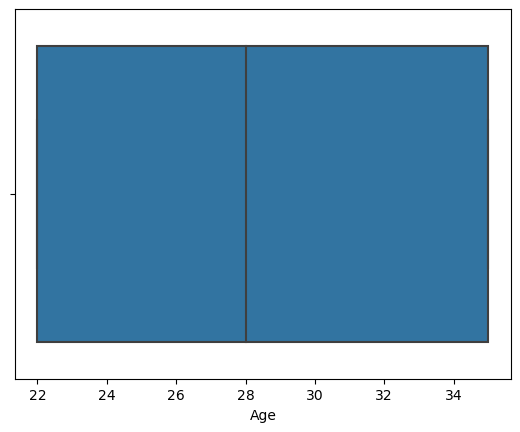

In [43]:
# Outliers Detection

sns.boxplot(x=df2['Age'])
plt.show()

##### SibSp Column

In this column, the maximum value is 70.00, and the minimum value is 0, but we can see this column has a mean value more than zero. Because this column has a gap in data, we decide to use the Winsorize again.

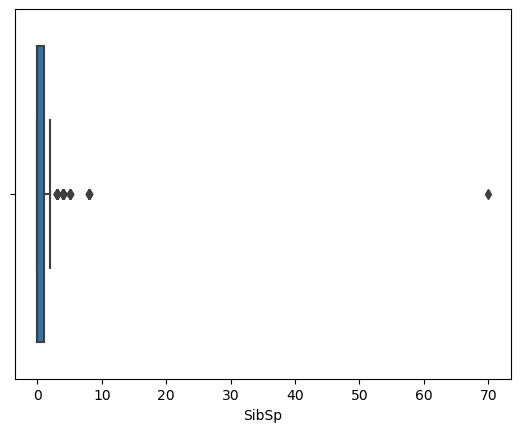

In [44]:
# Outliers Detection

sns.boxplot(x=df2['SibSp'])
plt.show()

In [45]:
df2['SibSp'].value_counts()

0     606
1     210
2      28
4      18
3      16
8       7
5       5
70      1
Name: SibSp, dtype: int64

As we can there a lot of range data, the standar deviation is only 2, so we change the values which are bigger than 2 into two and below to 0 into 0.

In [46]:
df2['SibSp'] = df2['SibSp'].replace([70, 5, 8, 3, 4], 2)
df2['SibSp'].value_counts()

0    606
1    210
2     75
Name: SibSp, dtype: int64

Check the result


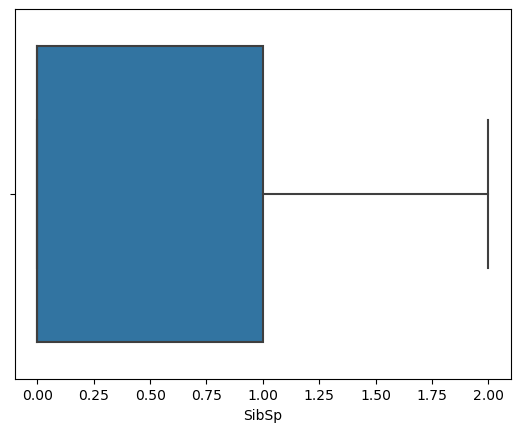

In [47]:
print("Check the result")

# Outliers Detection

sns.boxplot(x=df2['SibSp'])
plt.show()

Looks nice

##### Fare Column

In this column, the maximum value is bigger than 4000, while the minimum value is -12, but we can see this column has a mean value equal 36. Because this column has a gap in data, we decide to use the Wonorize again.

Checking Outlier


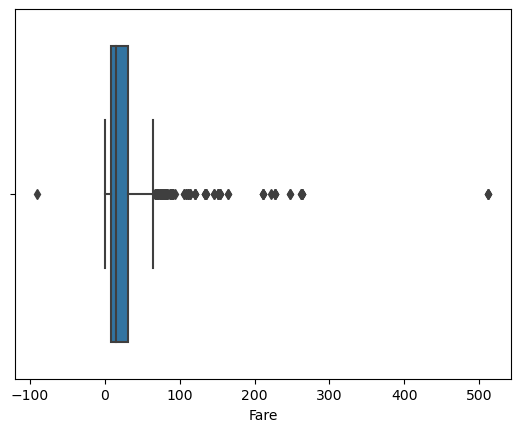

In [48]:
# Outliers Detection

print("Checking Outlier")
sns.boxplot(x=df2['Fare'])
plt.show()

In [49]:
df2['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
28.5000     1
6.2375      1
14.0000     1
9.4750      1
10.5167     1
Name: Fare, Length: 250, dtype: int64

Because Fare has a varied range, we choose the Winsorizing to replace with other values. Common is replacing the outliers on th upper side with 75% percentile value and outlier on the lower side with 25% percentile.

Check the result


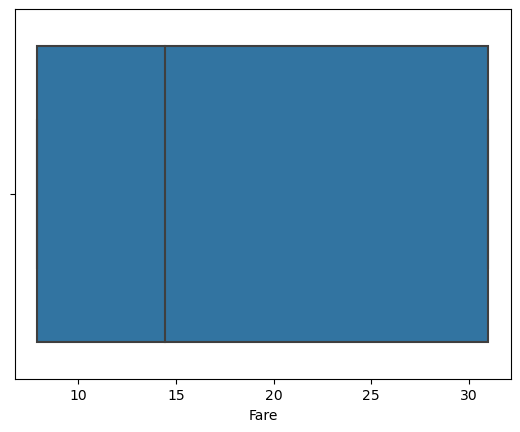

In [50]:
df2['Fare'] = winsorize(df2['Fare'], limits = 0.25)

print("Check the result")

# Outliers Detection

sns.boxplot(x=df2['Fare'])
plt.show()

## Result

In [51]:
df2.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ship
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.8958,Unknown,S,Titanic
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,35,1,0,PC 17599,31.0000,C85,C,Titanic
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Unknown,S,Titanic
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,31.0000,C123,S,Titanic
4,5,0,3.0,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Unknown,S,Titanic
5,6,0,3.0,"Moran, Mr. James",male,28,0,0,330877,8.4583,Unknown,Q,Titanic
6,7,0,1.0,"McCarthy, Mr. Timothy J",male,35,0,0,17463,31.0000,E46,S,Titanic
7,8,0,3.0,"Palsson, Master. Gosta Leonard",male,22,2,1,349909,21.0750,Unknown,S,Titanic
8,9,1,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,Unknown,S,Titanic
9,10,1,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,22,1,0,237736,30.0708,Unknown,C,Titanic


### Devided Title and Name

In [52]:
df2['Title'] = df['Name'].str.split().str[1]
df2['LastName'] = df2['Name'].str.split().str[0]
df2['FirstName'] = df2['Name'].str.split().str[2]

df2['LastName'] = df2['LastName'].str.replace(',','')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ship,Title,LastName,FirstName
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.8958,Unknown,S,Titanic,Mr.,Braund,Owen
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,35,1,0,PC 17599,31.0000,C85,C,Titanic,Mrs.,Cumings,John
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Unknown,S,Titanic,Miss.,Heikkinen,Laina
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,31.0000,C123,S,Titanic,Mrs.,Futrelle,Jacques
4,5,0,3.0,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Unknown,S,Titanic,Mr.,Allen,William


In [53]:
new_dataset = df2[["PassengerId","Survived","Pclass","Title","FirstName","LastName","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked","Ship"]]
new_dataset.head()

,PassengerId,Survived,Pclass,Title,FirstName,LastName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ship
0,1,0,3.0,Mr.,Owen,Braund,male,22,1,0,A/5 21171,7.8958,Unknown,S,Titanic
1,2,1,1.0,Mrs.,John,Cumings,female,35,1,0,PC 17599,31.0000,C85,C,Titanic
2,3,1,3.0,Miss.,Laina,Heikkinen,female,26,0,0,STON/O2. 3101282,7.9250,Unknown,S,Titanic
3,4,1,1.0,Mrs.,Jacques,Futrelle,female,35,1,0,113803,31.0000,C123,S,Titanic
4,5,0,3.0,Mr.,William,Allen,male,35,0,0,373450,8.0500,Unknown,S,Titanic


### Analysis

In [54]:
new_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.00000,891.000000
mean,447.254770,0.383838,2.308642,28.324355,0.404040,0.37037,18.023906
std,258.715268,0.486592,0.836071,4.967678,0.640001,0.76861,9.807991
min,-12.000000,0.000000,1.000000,22.000000,0.000000,0.00000,7.895800
25%,224.500000,0.000000,2.000000,22.000000,0.000000,0.00000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.00000,14.454200
75%,669.500000,1.000000,3.000000,35.000000,1.000000,0.00000,31.000000
max,1143.000000,1.000000,3.000000,35.000000,2.000000,5.00000,31.000000


### Normalization

In [55]:
df_scaled = df2[["Survived","Pclass","Age","SibSp","Parch","Fare"]]

In [56]:
# Apply normalization techniques
for column in df_scaled.columns:
    df_scaled[column] = (df_scaled[column] - df_scaled[column].min()) / (df_scaled[column].max() - df_scaled[column].min())
    
# view normalization data
print(df_scaled)

     Survived  Pclass       Age  SibSp  Parch      Fare
0         0.0     1.0  0.000000    0.5    0.0  0.000000
1         1.0     0.0  1.000000    0.5    0.0  1.000000
2         1.0     1.0  0.307692    0.0    0.0  0.001264
3         1.0     0.0  1.000000    0.5    0.0  1.000000
4         0.0     1.0  1.000000    0.0    0.0  0.006674
..        ...     ...       ...    ...    ...       ...
889       1.0     0.0  0.307692    0.0    0.0  0.956718
890       0.0     1.0  0.769231    0.0    0.0  0.000000
891       1.0     0.0  1.000000    0.5    0.0  1.000000
892       1.0     1.0  0.000000    0.5    0.2  0.381065
893       0.0     1.0  0.000000    0.0    0.0  0.000000

[891 rows x 6 columns]


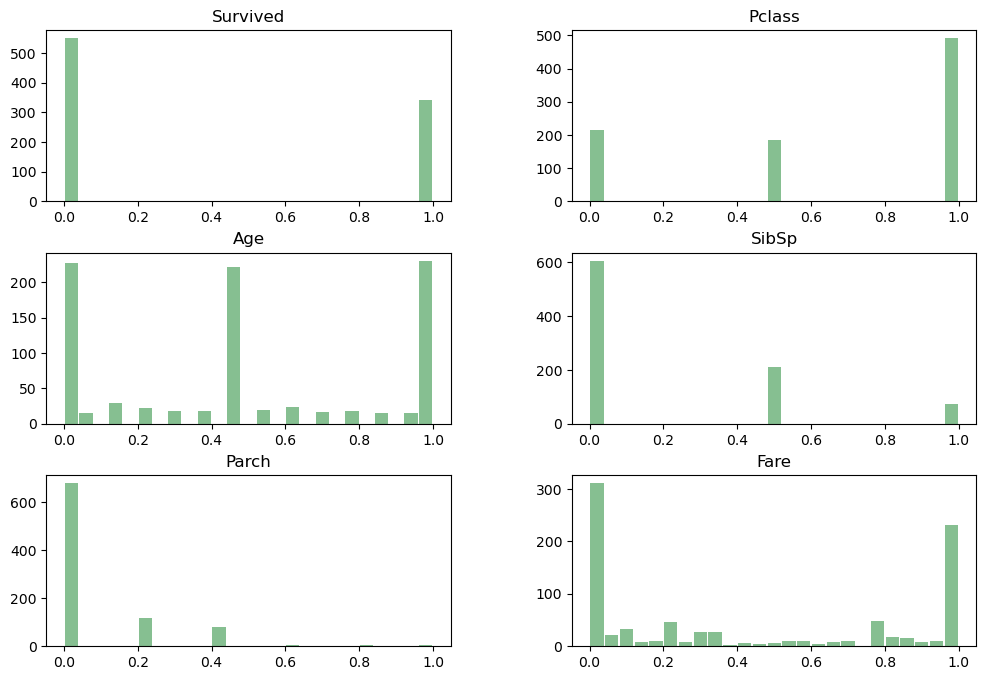

In [57]:
df_scaled.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

##### Saving New DataFrame

In [58]:
# saving the dataframe
new_dataset.to_csv('cleaning.csv')